# Análise Diagnóstica da Depressão em Estudantes


## 1- Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') #estilo de gráfico ggplot
plt.rcParams["figure.figsize"] = (8, 6) #definindo o figsize 8,6 para todos os gráficos

## 2 - Definindo o Dataframe

In [3]:
path = "https://raw.githubusercontent.com/massis93/Projetos_Analise_Dados/refs/heads/main/Python/Depression/Student%20Depression%20Dataset.csv"
df = pd.read_csv(path, sep = ';')
df.head()

,id,Gender,Age,City,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,5.0,5-6 hours,Healthy,Yes,3.0,No,1
1,8,Female,24.0,Bangalore,2.0,5-6 hours,Moderate,No,3.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,Less than 5 hours,Healthy,No,9.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,7-8 hours,Moderate,Yes,4.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,5-6 hours,Moderate,Yes,1.0,No,0


## 3 - Verificando se há algum valor missing


In [5]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

## 4 - Gender Análise



### 4.1 - Quantidade
Calcularei a quantidade de pessoas por gênero no nosso dataset

Text(0.5, 1.0, 'Quantidade por Gênero')

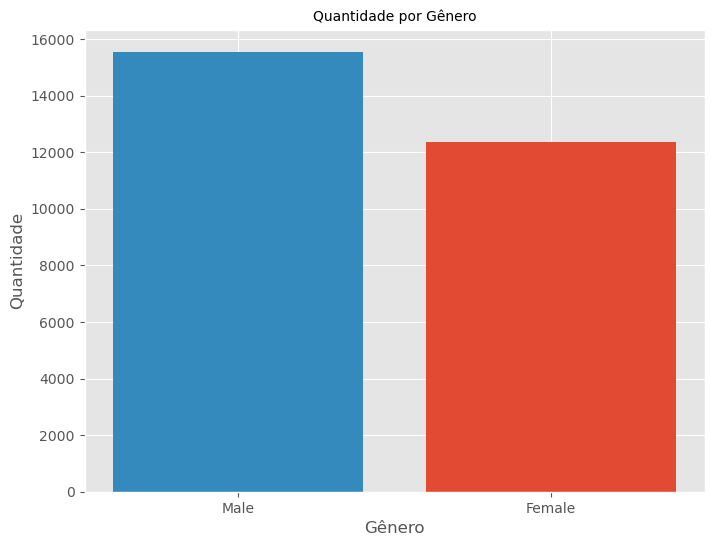

In [6]:
ngender = df['Gender'].value_counts() #quantidade por genero
plt.bar(ngender.index, ngender.values, color = ['#348ABD', '#E24A33']) #plotando um gráfico de barras
plt.ylabel('Quantidade') # setando o eixo y e x, e o título do gráfico
plt.xlabel('Gênero')
plt.title('Quantidade por Gênero', fontsize = 10)

### 4.2 Depressão por Gênero
Calcularei a proporção de depressivos por gênero para verificar se há algum gênero que tem mais probabilidade de ter depressão

Text(0.5, 1.0, 'Depression Male')

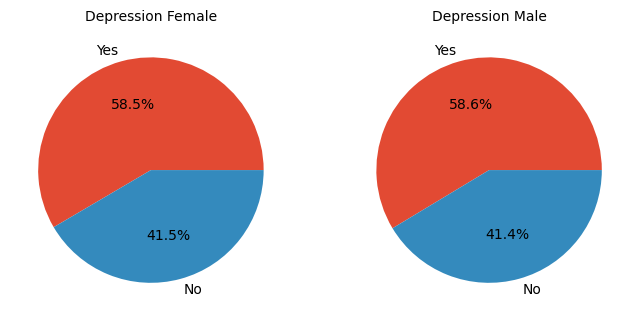

In [7]:
gender_depression = df.groupby('Gender')['Depression'].value_counts(normalize = False) #Quantidade de Depressão por Gênero
gender_depression

fig, ax = plt.subplots(1,2) #Setando o subplots para 1 linha e 2 colunas

ax[0].pie(gender_depression.iloc[0:2], autopct = '%1.1f%%', labels = ['Yes', 'No']) #Gráfico de Pizza 1
ax[0].set_title('Depression Female', fontsize = 10) #Definindo o Título
ax[1].pie(gender_depression.iloc[2:4], autopct = '%1.1f%%', labels = ['Yes', 'No'])#Gráfico de Pizza 2
ax[1].set_title('Depression Male', fontsize = 10) #Definindo o Título

## 5 - Cidade
Eliminarei as cidades que tem menos que 5 registros, para termos insights mais precisos

### 5.1 - Drop Cidades <= 5

In [8]:
city = df['City'].value_counts()
city = city[city>5]
cities = list(city.index)
df = df[df['City'].isin(cities)]
df.head()

,id,Gender,Age,City,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,5.0,5-6 hours,Healthy,Yes,3.0,No,1
1,8,Female,24.0,Bangalore,2.0,5-6 hours,Moderate,No,3.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,Less than 5 hours,Healthy,No,9.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,7-8 hours,Moderate,Yes,4.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,5-6 hours,Moderate,Yes,1.0,No,0


## 5.2 - Depression por Cidade
Irei calcular quais são as cidades que apresentam maior população com depressão

Text(0.5, 1.0, 'Porcentagem da Cidade com Depressão')

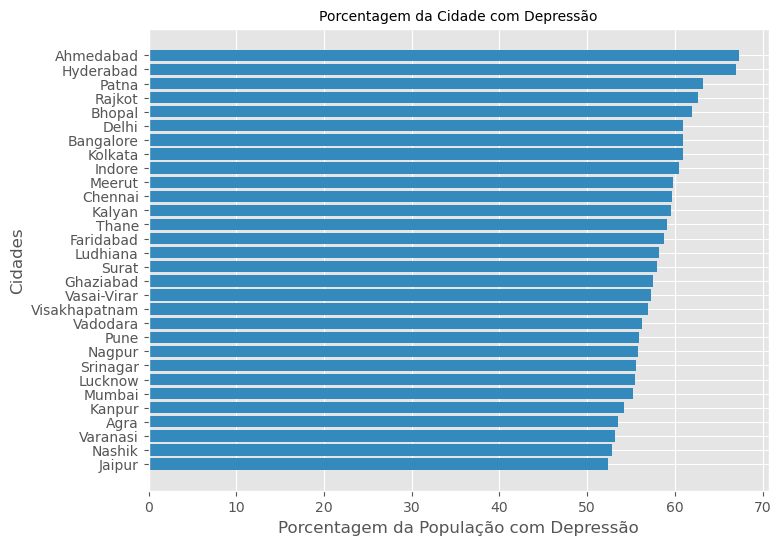

In [9]:
dc =df.groupby('City')['Depression'].mean().sort_values()*100
dc
plt.barh(dc.index, dc, color = '#348ABD')
plt.xlabel('Porcentagem da População com Depressão')
plt.ylabel('Cidades')
plt.title('Porcentagem da Cidade com Depressão', fontsize = 10)

## 6 - Idade

### 6.1 - Boxplot Idade Dataset
Com esse gráfico irei verificar as estatísticas descritivas da idade do dataset

Text(0.5, 1.0, 'Idade do Dataset')

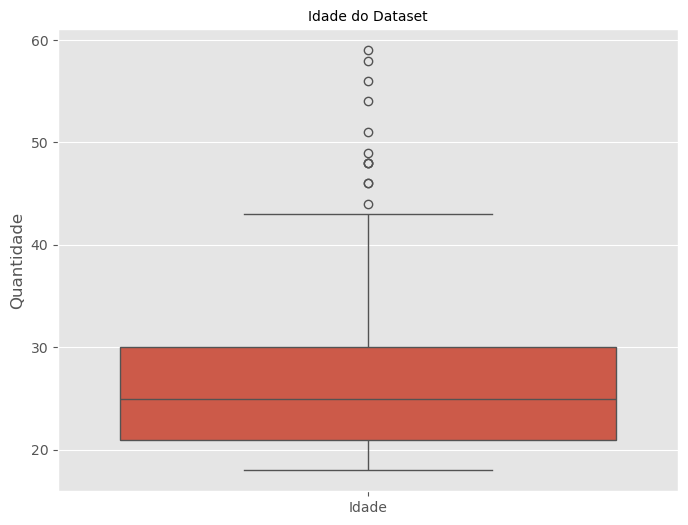

In [10]:
sns.boxplot(df['Age'], color = '#E24A33') #criando com seaborn um boxplot
plt.xticks([0],["Idade"]) #setando o tick
plt.ylabel('Quantidade') # Nome do Eixo y
plt.title('Idade do Dataset', fontsize = 10)

### 6.2 - Boxplot de Idade por Depression
Com esses dois boxplot faremos a comparação da idade de quem tem e quem não tem depressão

In [11]:
age_depression = df[df['Depression']== 1]['Age'].rename('Age1') #criando series e renomeando para aparecer dois boxplot 
age_nodepression=df[df['Depression']== 0]['Age'].rename('Age2')

Text(0.5, 0, 'Depression')

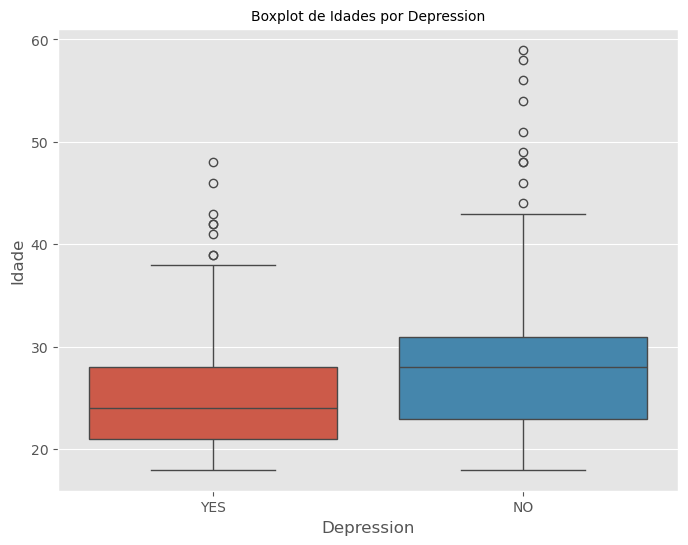

In [12]:
sns.boxplot(data =[age_depression, age_nodepression]) #criando dois boxplots
plt.xticks([0, 1], ["YES", "NO"]) #setando o tick e renomeando
plt.title("Boxplot de Idades por Depression", fontsize = 10)
plt.ylabel('Idade')
plt.xlabel('Depression')

## 7 -  Dietary Habits
- Aqui verificarei se há alguma relação em ter depressão com  o estilo de  dieta
- Eliminarei o Dietary Habits = Others pois tem muito pouco dados e não agregará em nada na nossa análise

In [13]:
df = df[df['Dietary Habits'].isin(['Moderate','Healthy','Unhealthy'])] #Eliminando o Dietary Habits = Others
diet_depression = (df.groupby('Depression')['Dietary Habits']
                    .value_counts()
                    .reset_index()
                    .sort_values(by = ['Depression', 'Dietary Habits']))  #Criando um dataset Depression/DietaryHabits com contagem
diet_depression


,Depression,Dietary Habits,count
1,0,Healthy,4174
0,0,Moderate,4360
2,0,Unhealthy,3016
5,1,Healthy,3470
4,1,Moderate,5555
3,1,Unhealthy,7288


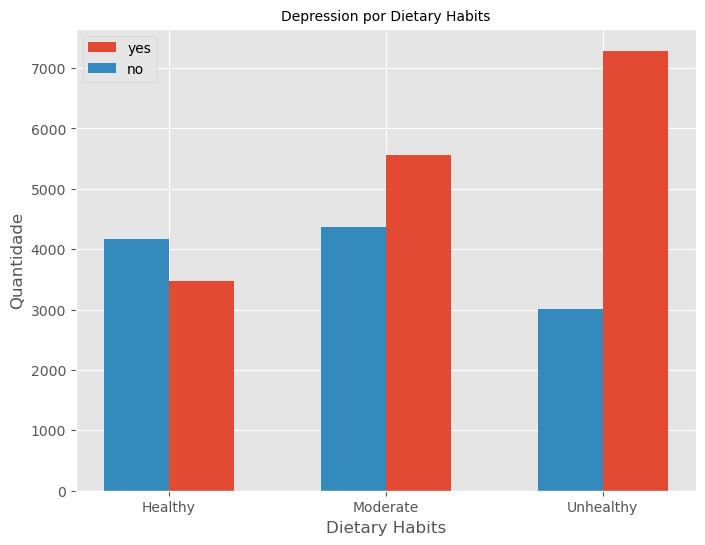

In [14]:
fig , ax = plt.subplots() #subplots para gráfico agrupado
x = np.arange(3) #definindo 3 categorias
largura = 0.3 #largura da barra

ax.bar(x + largura/2, diet_depression.iloc[3:6,2], width = largura, label = 'yes') #Plotando gráfico 1
ax.bar(x - largura/2, diet_depression.iloc[0:3,2], width = largura, label = 'no') #plotando gráfico 2
plt.xticks(x, ["Healthy", "Moderate", 'Unhealthy']) # defindo as 3 categorias
plt.title('Depression por Dietary Habits', fontsize = 10) #setando o titulo e o x,y axis
plt.ylabel('Quantidade')
plt.xlabel('Dietary Habits')
plt.legend() # colocando legenda



## 8 - History
Verificarei se pessoas que tem histórico de mental illness influenciam em ter ou não depressão

In [15]:
familiar_dp = df.groupby('Family History of Mental Illness')['Depression'].value_counts(normalize= True).reset_index()
familiar_dp #dataset por depression e history

,Family History of Mental Illness,Depression,proportion
0,No,1,0.559939
1,No,0,0.440061
2,Yes,1,0.612676
3,Yes,0,0.387324


Text(0.5, 0.98, 'Histórico de Mental Illness')

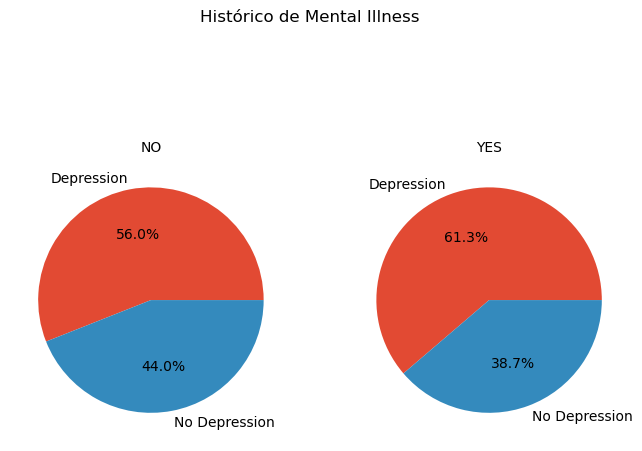

In [16]:
fig , ax = plt.subplots(1,2) #subplot de 1linha e 2 colunas
ax[0].pie(familiar_dp.iloc[0:2,2], autopct = '%1.1f%%', labels = ['Depression', 'No Depression']) #criando pizza 1
ax[0].set_title('NO', fontsize = 10) #setando titulo
ax[1].pie(familiar_dp.iloc[2:4,2], autopct = '%1.1f%%', labels = ['Depression', 'No Depression']) #criando pizza 2
ax[1].set_title('YES', fontsize = 10) #setando titulo
plt.suptitle('Histórico de Mental Illness') #setando titulo superior

## 9 - Sleep and Depression
- Verificarei se há alguma relação entre uma qualidade de sono boa e ter depression
- Eliminei os dados de sleep = Others pois além de serem poucos dados, não contribuirão com nossa análise

<BarContainer object of 4 artists>

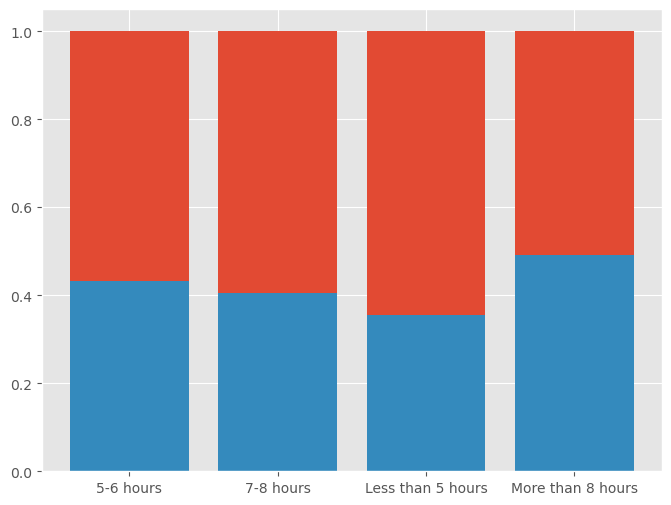

In [17]:
df = df[df['Sleep Duration'].isin(['7-8 hours','More than 8 hours','Less than 5 hours','5-6 hours'])] #Filtrando others
sd = df.groupby('Sleep Duration')['Depression'].value_counts(normalize = True).reset_index().sort_values(['Depression', 'Sleep Duration']) #dataframe de sleep/depression
sd0 = sd[sd['Depression']== 0] #filtrando depression False
sd1 = sd[sd['Depression']== 1] #filtrando depression True

plt.bar(sd0['Sleep Duration'], sd0['proportion'], color = '#348ABD') #plotando depression false
plt.bar(sd1['Sleep Duration'], sd1['proportion'], color = '#E24A33', bottom = sd0['proportion']) #plotando depression true empilhado

## 10 - Suicidal Thoughts
Aqui verificarei a proporção de pessoas que tem pensamentos suicidas em pessoas que tem e não tem depressão

Text(0.5, 1.0, 'Depression Yes')

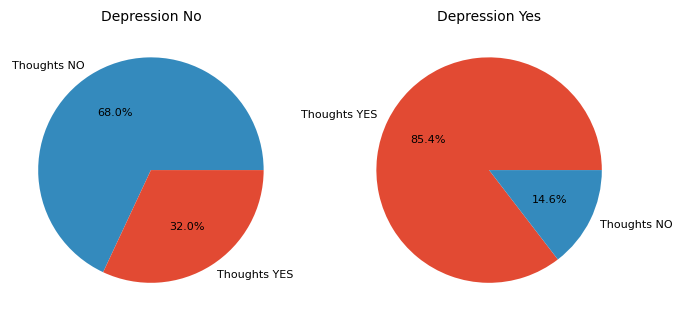

In [18]:
t = df.groupby('Depression')['Have you ever had suicidal thoughts ?'].value_counts() #Criando dataset depression/thoughts
t0 = t[0:2] #valores depression false
t1 = t[2:4] #valores depression True

fig, ax = plt.subplots(1,2) #criando subplots

ax[0].pie(t0, colors = ['#348ABD','#E24A33'], labels = ['Thoughts NO', 'Thoughts YES'], autopct = '%1.1f%%',textprops={'fontsize': 8, 'color': 'black'})
ax[0].set_title('Depression No', fontsize = 10)
ax[1].pie(t1, colors = ['#E24A33','#348ABD'], labels = ['Thoughts YES', 'Thoughts NO'], autopct = '%1.1f%%', textprops={'fontsize': 8, 'color': 'black'})
ax[1].set_title('Depression Yes', fontsize = 10)


## 11- Mapa de Calor Bivariado
Farei uma análise bivariada entre Work/Study hours, e Academic Pressure. Os valores se~roa porcentagem dessas pessoas que tem depressão.

Text(0.5, 1.0, 'Heatmap Porcentagem com Depressão')

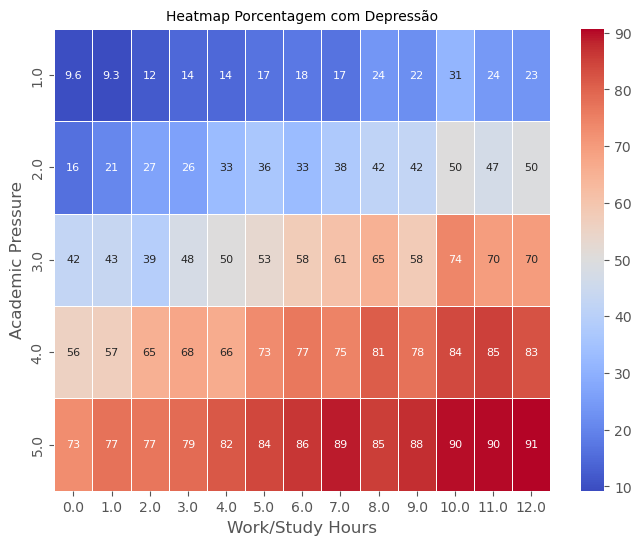

In [19]:

heat = (df[['Work/Study Hours','Academic Pressure','Depression']].dropna().pivot_table(index = 'Academic Pressure',
                                                                      columns= 'Work/Study Hours',
                                                                      values = 'Depression',
                                                                      aggfunc ='mean')
                                                                   .drop(0))*100 #Pivotando a tabela criada


sns.heatmap(heat, cmap = 'coolwarm', annot = True, annot_kws={'size': 8},linewidths=0.5) #heatmap com seaborn, anott são os rótulos de dados
plt.title('Heatmap Porcentagem com Depressão', fontsize = 10) #setando o titulo